# Misc dataset

In [11]:
from model.graph_mcmc import Graph_MCMC

In [12]:
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

In [13]:
graph = Graph_MCMC()
graph.read_from_ns("sp_primary_school/day_2") # escorts could be fun

In [14]:
graph.remove_property("viz")
graph.remove_property("label")

False

In [15]:
graph.G.vertex_properties

{'_graphml_vertex_id': <VertexPropertyMap object with value type 'int16_t', for Graph 0x7ffb40047100, at 0x7ffb40047d90>, '_pos': <VertexPropertyMap object with value type 'vector<double>', for Graph 0x7ffb40047100, at 0x7ffad0182e80>, '1A': <VertexPropertyMap object with value type 'bool', for Graph 0x7ffb40047100, at 0x7ffad01e9d90>, '1B': <VertexPropertyMap object with value type 'bool', for Graph 0x7ffb40047100, at 0x7ffb397eeb20>, '2A': <VertexPropertyMap object with value type 'bool', for Graph 0x7ffb40047100, at 0x7ffad019e580>, '2B': <VertexPropertyMap object with value type 'bool', for Graph 0x7ffb40047100, at 0x7ffad019e5e0>, '3A': <VertexPropertyMap object with value type 'bool', for Graph 0x7ffb40047100, at 0x7ffad019e760>, '3B': <VertexPropertyMap object with value type 'bool', for Graph 0x7ffb40047100, at 0x7ffad019e910>, '4A': <VertexPropertyMap object with value type 'bool', for Graph 0x7ffb40047100, at 0x7ffad019e970>, '4B': <VertexPropertyMap object with value type 'b

In [16]:
graph.convert_props_to_flags()
graph.remove_property("Unknown")

False

In [17]:
graph.print_info()

Graph with N=238 nodes, E=5539 edges and D=13 vertex features for training


In [18]:
graph.list_props()

name                   (graph)   (type: string, val: sp_primary_school (day_2))
description            (graph)   (type: string, val: Two temporal networks of
                                                     contacts among students
                                                     and teachers at a primary
                                                     school in Lyon, France, on
                                                     consecutive days of in
                                                     October 2009. Each network
                                                     accumulates all contacts
                                                     over the course of a
                                                     single day; contacts were
                                                     sampled at 20-second
                                                     intervals)
citation               (graph)   (type: string, val: ['Juliette Stehle et al.,
  

In [19]:
graph.partition(B_min=10, B_max=10) # 18 used in other

Performing inference...
Current bracket: (10, 10, 10) (10914.709483863962, 10914.709483863962, 10914.709483863962)
Current bracket: (10, 10, 10) (10914.709483863962, 10914.709483863962, 10914.709483863962)
Bisect at B = 10 with S = 10914.70948386396
Best result: B = 10, S = 10914.70948386396
Done


<VertexPropertyMap object with value type 'int32_t', for Graph 0x7ffb40047100, at 0x7ffacda3a550>

In [20]:
graph.mcmc(num_iter=10000)

100%|██████████| 10000/10000 [00:10<00:00, 926.56it/s]


45.8673656323759

In [32]:
#graph.draw(gen_layout=False, output="school-graph.png", size=7)
graph.draw(gen_layout=False, size=7)

Drawing soft partition


Drawing block adjacency matrix $e_{rs}$


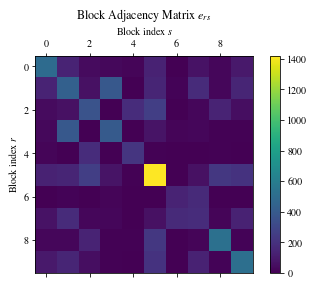

In [22]:
graph.plot_matrix()

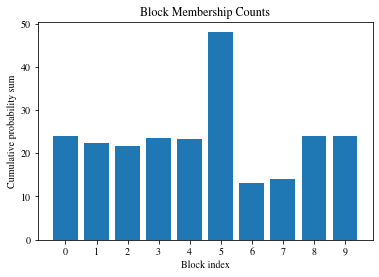

In [23]:
graph.plot_posterior_props()

## Train classifier

In [24]:
classifier = graph.sample_classifier_mala(10000, step_scaling=0.1, verbose=True)

100%|██████████| 10000/10000 [00:10<00:00, 933.60it/s]Sample accept ratio: 83.89999999999999%
Train. set accuracy: 78.57142857142857%



## Interpret results

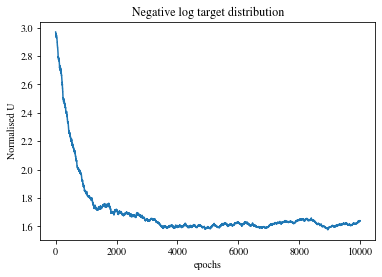

1.7010590137577062

In [25]:
classifier.plot_U()

In [26]:
classifier.thin_samples(burn_in_pc=30, thinning_pc=10)

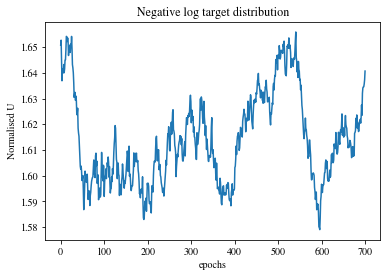

1.6138539494600666


In [27]:
u_mean = classifier.plot_U()
print(u_mean)

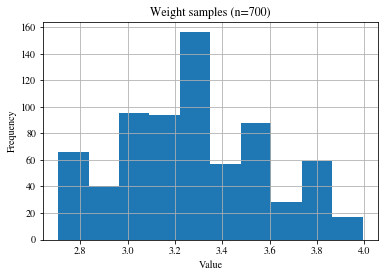

In [28]:
classifier.plot_sample_histogram()

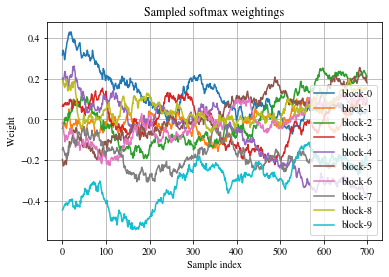

In [29]:
classifier.plot_sample_history()

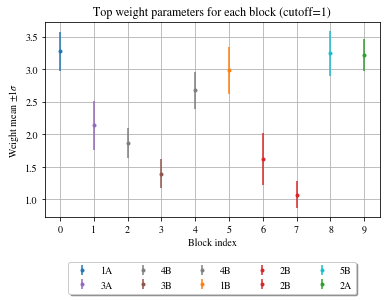

In [30]:
names = list(graph.get_feature_names())
classifier.plot_block_principal_dims(names, cutoff=1, legend=True)

Discarding feature 10: Teachers
Discarding feature 11: F
Discarding feature 12: M
Discarding feature 13: bias


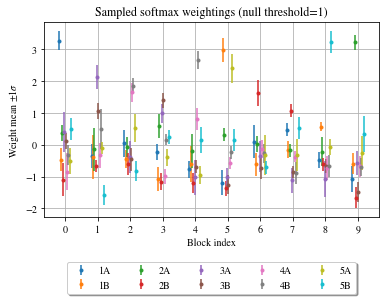

In [31]:
names = list(graph.get_feature_names())
classifier.plot_sampled_weights(names, std_dev_multiplier=1, null_space=1, legend=True)